In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [6]:
df = pd.read_csv('../data/clean_political_social_media.csv')
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,85,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,136,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,139,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,110,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,128,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.groupby('message').count()

,unit_id,audience,bias,source,cantidad_caracteres,usuario,cargo,estado,language_name,cantidad_arrobas,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
message,,,,,,,,,,,,,,,,,,,,,
attack,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
support,921,921,921,921,921,921,921,921,921,921,...,921,921,921,921,921,921,921,921,921,921


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unit_id              1093 non-null   int64 
 1   audience             1093 non-null   object
 2   bias                 1093 non-null   object
 3   message              1093 non-null   object
 4   source               1093 non-null   object
 5   cantidad_caracteres  1093 non-null   int64 
 6   usuario              1093 non-null   object
 7   cargo                1093 non-null   object
 8   estado               1093 non-null   object
 9   language_name        1093 non-null   object
 10  cantidad_arrobas     1093 non-null   int64 
 11  cantidad_hashtag     1093 non-null   int64 
 12  tiene_obama          1093 non-null   int64 
 13  cantidad_obamacare   1093 non-null   int64 
 14  tiene_costs          1093 non-null   int64 
 15  tiene_venezuela      1093 non-null   int64 
 16  tiene_

In [8]:
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['unit_id', 'cantidad_caracteres', 'cantidad_arrobas',
       'cantidad_hashtag', 'tiene_obama', 'cantidad_obamacare', 'tiene_costs',
       'tiene_venezuela', 'tiene_demandar', 'tiene_remember', 'tiene_stuck',
       'tiene_higher', 'tiene_spawning', 'tiene_please', 'tiene_join',
       'tiene_great', 'tiene_vote', 'tiene_share', 'tiene_applaud',
       'tiene_clinton'],
      dtype='object')

<AxesSubplot: title={'center': 'Boxplot decantidad_caracteres'}, xlabel='cantidad_caracteres'>

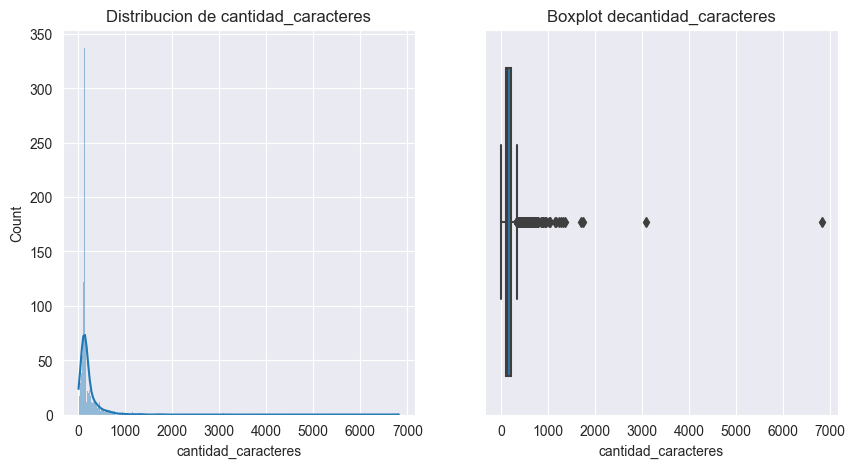

In [9]:
variable = 'cantidad_caracteres'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Podemos obervar, que pareceria ser una distribucion normal, pero con outliers. Po rlo tanto esclaamos con robusto

In [12]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df['cantidad_caracteres'] = rb_scaler.fit_transform(df[['cantidad_caracteres']])
df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: title={'center': 'Boxplot decantidad_arrobas'}, xlabel='cantidad_arrobas'>

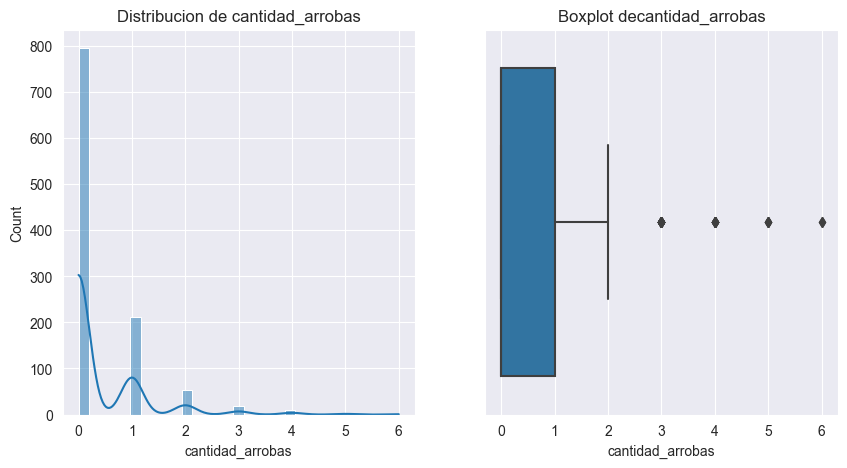

In [13]:
variable = 'cantidad_arrobas'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [14]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_arrobas']= minmaxscaler.fit_transform(df[['cantidad_arrobas']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: title={'center': 'Boxplot decantidad_hashtag'}, xlabel='cantidad_hashtag'>

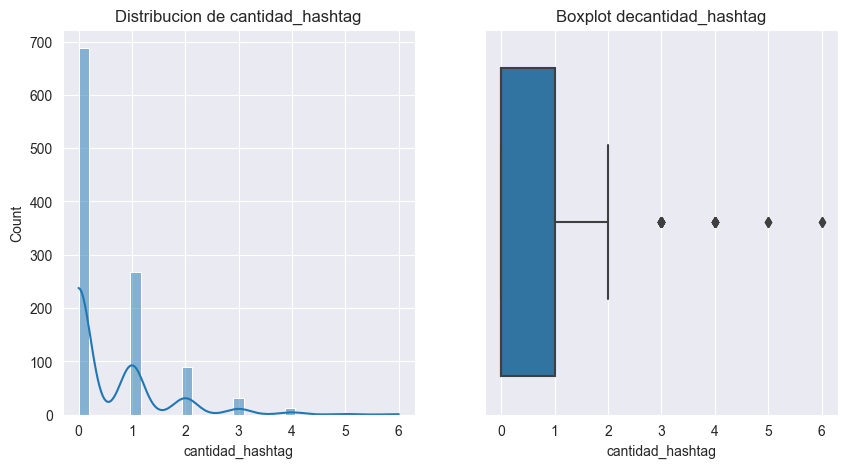

In [15]:
variable = 'cantidad_hashtag'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [16]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

df['cantidad_hashtag']= minmaxscaler.fit_transform(df[['cantidad_hashtag']])

df.head()

,unit_id,audience,bias,message,source,cantidad_caracteres,usuario,cargo,estado,language_name,...,tiene_stuck,tiene_higher,tiene_spawning,tiene_please,tiene_join,tiene_great,tiene_vote,tiene_share,tiene_applaud,tiene_clinton
0,766192485,national,partisan,attack,twitter,-0.602273,Mitch McConnell,Senator,Kentucky,English,...,0,1,0,0,0,0,0,0,0,0
1,766192486,national,neutral,support,twitter,-0.022727,Kurt Schrader,Representative,Oregon,English,...,0,0,0,1,1,0,0,0,0,0
2,766192493,national,partisan,support,twitter,0.011364,Steny Hoyer,Representative,Maryland,English,...,0,0,0,0,0,1,0,0,0,1
3,766192495,national,partisan,attack,twitter,-0.318182,Adam Kinzinger,Representative,Illinois,English,...,0,0,0,0,0,0,0,0,0,0
4,766192501,national,neutral,support,twitter,-0.113636,Elizabeth Esty,Representative,Connecticut,English,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: title={'center': 'Boxplot decantidad_obamacare'}, xlabel='cantidad_obamacare'>

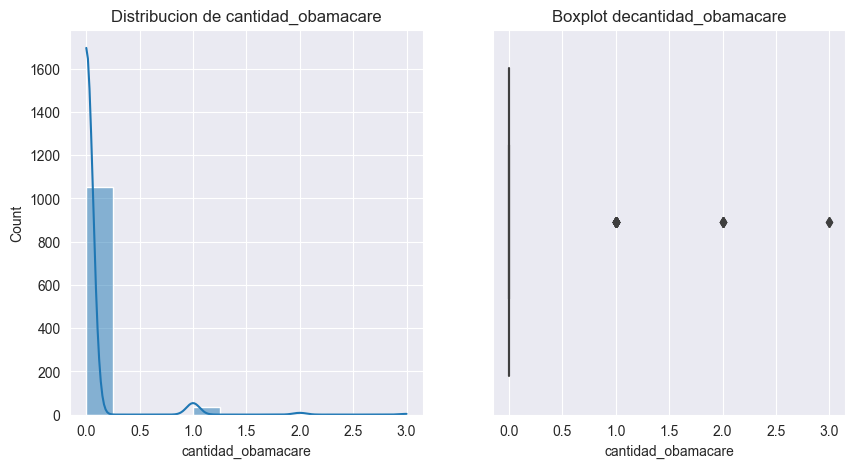

In [17]:
variable = 'cantidad_obamacare'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])